# Linear Regression to estimate high-order epistasis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from epistasis.models import EpistasisNonlinearRegression

# Define the nonlinear relationship and it's inverse.
def diminishing_returns(x, A):
    return 1.0 / (1 + A * np.exp(-x))  

def reverse_func(y, A):
    return -np.log(((1 / y) - 1)/A)

# Initialize the model
model = EpistasisNonlinearRegression.read_json("../data/nonlinear-data.json",
    order=2,
    function=diminishing_returns,
    reverse=reverse_func,
    model_type="local",
    A=1
)

# Fit the model.
model.fit(A=1)

EpistasisNonlinearRegression(function=<function diminishing_returns at 0x113de9620>,
               model_type='local', order=2,
               reverse=<function reverse_func at 0x113de97b8>)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from epistasis.models import EpistasisPowerTransform


# Initialize the model
model = EpistasisPowerTransform.read_json("../data/nonlinear-data.json",
    order=1,
    model_type="global")

# Fit the model.
model.fit(lmbda=1, B=.5, A=0)

EpistasisPowerTransform(model_type='global', order=1)

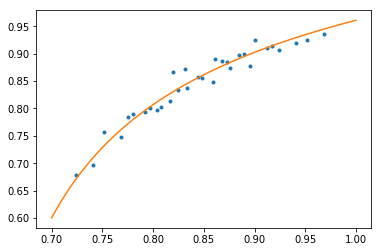

In [7]:
xadd = model.Additive.predict()
plt.plot(xadd, model.gpm.phenotypes, '.')
xmodel = np.linspace(.7, 1.0, 1000)
ymodel = model.function(xmodel, *model.parameters.values(), data=xadd)
plt.plot(xmodel, ymodel, '-')

array([ 0.89439285,  0.80281964,  0.92900247,  0.85970684,  0.84508865,
        0.7101365 ,  0.89084576,  0.79665575,  0.91411081,  0.83591047,
        0.94479867,  0.88395927,  0.87144199,  0.7616586 ,  0.91099904,
        0.83081364,  0.88132087,  0.77975637,  0.91869733,  0.84334243,
        0.82716541,  0.67191921,  0.87746201,  0.77275879,  0.90267472,
        0.81695313,  0.93560054,  0.86995446,  0.8562536 ,  0.73258389,
        0.89931548,  0.811263  ])

In [ ]:
padd = model.Linear.predict(X="obs")
pobs = model.gpm.phenotypes
plt.plot(padd, pobs, "o")

xmodel = np.linspace(-.5, 2)
ymodel = model.function(xmodel, model.parameters['A'])

plt.plot(xmodel, ymodel, "-r")
plt.xlabel("$P_{lin}$", fontsize=14)
plt.ylabel("$P_{obs}$", fontsize=14)
plt.title("Nonlinear epistasis model")
plt.show()

In [4]:
from epistasis.plot import corr_resid_rhist, coefs

(<matplotlib.figure.Figure at 0x11313a860>,
  <matplotlib.axes._subplots.AxesSubplot at 0x113305780>])

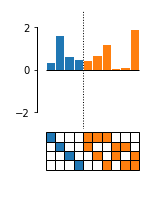

In [5]:
coefs(model.Linear.epistasis.values, model.Linear.epistasis.sites, figsize=(2,3))